In [2]:
import numpy as np 
import matplotlib.pyplot as plt

In [3]:
data = np.loadtxt('ex1data1.txt',delimiter=',')
m = len(data)

In [4]:
X = data[:,0].reshape(m,1)
y = data[:,1].reshape(m,1)


Text(0, 0.5, 'Profit in $10,000s')

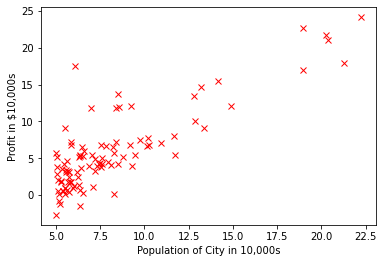

In [5]:
plt.plot(X,y,'rx')
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')

In [6]:
X = np.hstack((np.ones((m,1),dtype=np.float64),X))
theta = np.zeros((2,1),dtype=np.float64)
iterations = 1500
alpha = 0.01

In [7]:
def h(x,theta):
    return x*theta

In [8]:
def J(X,y,theta):
    m = len(y)
    return (np.dot((np.dot(X,theta)-y).swapaxes(0,1),np.dot(X,theta)-y)/(2*m))[0][0]

In [9]:
J(X,y,theta)

32.07273387745567

In [10]:
J(X,y,np.array([[-1],[2]]))

54.24245508201236

In [11]:
def gradientDescent(X, y, theta, alpha, iterations):
    m = len(y)
    J_history = np.zeros((iterations,1),dtype=np.float64)
    for i in range(iterations):
        theta = theta - alpha/m*(np.dot(X.swapaxes(0,1),np.dot(X,theta)-y))
        J_history[i][0] = J(X,y,theta)
    return theta,J_history

In [12]:
theta,J_history = gradientDescent(X, y, theta, alpha, iterations)
print('Theta computed from gradient descent:\n%f,\n%f' % (theta[0],theta[1]))

Theta computed from gradient descent:
-3.630291,
1.166362


In [13]:
J_history

array([[6.73719046],
       [5.93159357],
       [5.90115471],
       ...,
       [4.48343473],
       [4.48341145],
       [4.48338826]])

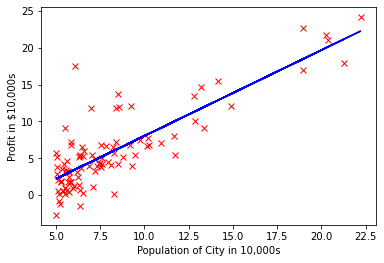

In [14]:
plt.plot(X[:,1],y,'rx')
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.plot(X[:,1],np.dot(X,theta),'b-')
plt.show()

In [15]:
# Predict values for population sizes of 35,000 and 70,000
predict1 = np.dot([1, 3.5],theta)
print('For population = 35,000, we predict a profit of %f\n' % float(predict1*10000))

For population = 35,000, we predict a profit of 4519.767868



In [16]:
predict2 = np.dot([1, 7] , theta)
print('For population = 70,000, we predict a profit of %f\n' % float(predict2*10000))

For population = 70,000, we predict a profit of 45342.450129



In [17]:
# Visualizing J(theta_0, theta_1):
# Grid over which we will calculate J
theta0_vals = np.linspace(-10, 10, 100)
theta1_vals = np.linspace(-1, 4, 100)

# initialize J_vals to a matrix of 0's
J_vals = np.zeros((len(theta0_vals), len(theta1_vals)), dtype=np.float64)

# Fill out J_vals
for i in range(len(theta0_vals)):
    for j in range(len(theta1_vals)):
        t = np.array([theta0_vals[i],theta1_vals[j]]).reshape(2,1)
        J_vals[i][j] = J(X, y, t)

Text(0.5, 0, 'J_vals')

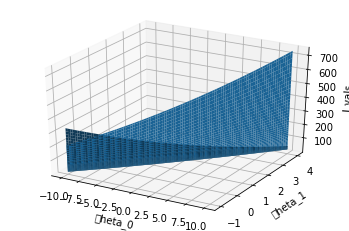

In [18]:
# Because of the way meshgrids work in the surf command, we need to 
# transpose J_vals before calling surf, or else the axes will be flipped
J_vals = J_vals.swapaxes(0,1)

# Surface plot
ax = plt.subplot(111,projection='3d')
ax.plot_surface(theta0_vals,theta1_vals,J_vals,rstride=2,cstride=1)
ax.set_xlabel('\theta_0')
ax.set_ylabel('\theta_1')
ax.set_zlabel('J_vals')

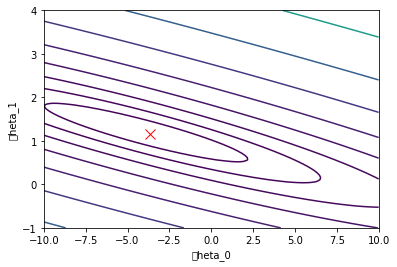

In [19]:
# Contour plot
# Plot J_vals as 15 contours spaced logarithmically between 0.01 and 100
# contour(theta0_vals, theta1_vals, J_vals, logspace(-2, 3, 20))
plt.contour(theta0_vals, theta1_vals, J_vals, np.logspace(-2, 3, 20))
plt.xlabel('\theta_0')
plt.ylabel('\theta_1')
plt.plot(theta[0], theta[1], 'rx', markersize=10, linewidth=2)

In [25]:
data2 = np.loadtxt('ex1data2.txt',delimiter=',')
m = len(data2)
n = len(data2[0])-1
m,n

(47, 2)

In [30]:
X = data2[:,0:n].reshape(m,n)
y = data2[:,n].reshape(m,1)

In [39]:
# Print out some data points
# First 10 examples from the dataset
for i in range(10):
    print(' x = [%.0f %.0f], y = %.0f ' % (X[i][0],X[i][1],y[i,:]))

 x = [2104 3], y = 399900 
 x = [1600 3], y = 329900 
 x = [2400 3], y = 369000 
 x = [1416 2], y = 232000 
 x = [3000 4], y = 539900 
 x = [1985 4], y = 299900 
 x = [1534 3], y = 314900 
 x = [1427 3], y = 198999 
 x = [1380 3], y = 212000 
 x = [1494 3], y = 242500 


In [47]:
def featureNormalize(X):
    X_norm = X
    mu = np.zeros((1, np.size(X, 1)),dtype=np.float64)
    sigma = np.zeros((1, np.size(X, 1)),dtype=np.float64)
    n = np.size(X,1)
    m = np.size(X,0)
    mu = np.mean(X,0)
    sigma = np.std(X,0)
    X_norm = (X-mu.repeat(m).reshape(n,m).swapaxes(0,1))/(sigma.repeat(m).reshape(n,m).swapaxes(0,1))
    return X_norm,mu,sigma

In [48]:
# Scale features and set them to zero mean
X, mu, sigma = featureNormalize(X)

In [50]:
# Add intercept term to X
X = np.hstack((np.ones((m,1),dtype=np.float64),X))

In [52]:
def gradientDescentMulti(X, y, theta, alpha, num_iters):
    m = len(y)
    J_history = np.zeros((iterations,1),dtype=np.float64)
    for i in range(iterations):
        theta = theta - alpha/m*(np.dot(X.swapaxes(0,1),np.dot(X,theta)-y))
        J_history[i][0] = J(X,y,theta)
    return theta,J_history

In [53]:
# Run gradient descent
# Choose some alpha value
alpha = 0.1
num_iters = 400

# Init Theta and Run Gradient Descent 
theta = np.zeros((3, 1),dtype=np.float64)
theta, J_0 = gradientDescentMulti(X, y, theta, alpha, num_iters)

# Display gradient descent's result
print('Theta computed from gradient descent:\n%f\n%f\n%f' % (theta[0],theta[1],theta[2]))

Theta computed from gradient descent:
340412.659574
109447.796470
-6578.354854


In [57]:
# Estimate the price of a 1650 sq-ft, 3 br house
# ====================== YOUR CODE HERE ======================
x_test = np.array([1650,3])
x_normed = (x_test-mu)/sigma
x_normed = np.hstack((np.ones((1),dtype=np.float64),x_normed))
x_normed

array([ 1.        , -0.44604386, -0.22609337])

In [59]:
price = np.dot(x_normed, theta) # Enter your price formula here

# ============================================================

print('Predicted price of a 1650 sq-ft, 3 br house (using gradient descent):\n $%f' % price)

Predicted price of a 1650 sq-ft, 3 br house (using gradient descent):
 $293081.464335


In [73]:
def normalEqn(X, y):
    theta = np.zeros((np.size(X,1),1),dtype=np.float64)
    a = np.dot(X.swapaxes(0,1),X)
    a = np.linalg.pinv(a)
    b = X.swapaxes(0,1)
    theta = np.dot(np.dot(a,b),y)
    return theta

In [74]:
#  Solve with normal equations:
#  Load Data
data3 = np.loadtxt('ex1data2.txt',delimiter=',')
m = len(data3)
n = len(data3[0])-1
X = data3[:,0:n].reshape(m,n)
y = data3[:,n].reshape(m,1)

# Add intercept term to X
X = np.hstack((np.ones((m,1),dtype=np.float64),X))

# Calculate the parameters from the normal equation
theta = normalEqn(X, y)

# Display normal equation's result
print('Theta computed from the normal equations:\n%f\n%f\n%f' % (theta[0],theta[1],theta[2]))

Theta computed from the normal equations:
89597.909544
139.210674
-8738.019113


In [78]:
# Estimate the price of a 1650 sq-ft, 3 br house. 
# ====================== YOUR CODE HERE ======================
x_test_2 = np.hstack((np.array([1]),x_test))
x_test_2

array([   1, 1650,    3])

In [79]:
price = np.dot(x_test_2,theta) # Enter your price forumla here

# ============================================================

print('Predicted price of a 1650 sq-ft, 3 br house (using normal equations):\n $%f' % price)

Predicted price of a 1650 sq-ft, 3 br house (using normal equations):
 $293081.464335
